<a href="https://colab.research.google.com/github/isisfcarvalho/tp1-icv/blob/main/Compress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático 1: Compressão de Imagens

**Grupo**:

- Isis Ferreira Carvalho (2020006663)
- Lucas Mesquita Andrade (2020054668)
- Victor Augusto de Lima Cruz (2020054854)

In [ ]:
%matplotlib inline
import cv2
import io
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.image as mpimg

## Implementar:

- leitura de imagem
- codificação
- salvar arquivo codificado no disco
- decodificação
- exibição da imagem reconstruída
- mostrar PSNR e taxa de compressão resultantes


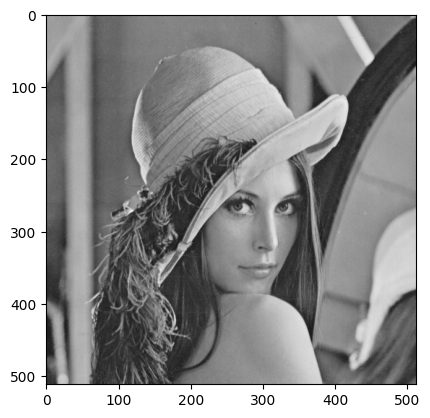

In [ ]:
# Leitura da imagem
img = cv2.imread('/content/lena512.pgm',0)
plt.imshow(img, cmap = 'gray', clim=(0, 255))

In [ ]:
img.shape

(512, 512)

In [ ]:
with open('file', "w") as file:
    img.tofile(file)

In [1]:
import heapq
from collections import defaultdict, Counter

# Função para encontrar as correspondências mais longas (baseado em LZ77)
def lz77_compress(data, window_size=20):
    i = 0
    compressed = []
    while i < len(data):
        match = ''
        distance = 0
        length = 0
        for j in range(max(0, i - window_size), i):
            k = 0
            while i + k < len(data) and data[j + k] == data[i + k]:
                k += 1
            if k > length:
                length = k
                distance = i - j
                match = data[j:j + k]
        if length > 0:
            compressed.append((distance, length, data[i + length]))
            i += length + 1
        else:
            compressed.append((0, 0, data[i]))
            i += 1
    return compressed

# Função para criar a árvore de Huffman
def huffman_tree(freqs):
    heap = [[wt, [sym, ""]] for sym, wt in freqs.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

# Função para comprimir os dados usando a árvore de Huffman
def huffman_compress(data):
    freq = Counter(data)
    huff_tree = huffman_tree(freq)
    huff_dict = {sym: code for sym, code in huff_tree}
    compressed = ''.join(huff_dict[sym] for sym in data)
    return compressed, huff_dict

# Função para descomprimir os dados usando a árvore de Huffman
def huffman_decompress(compressed, huff_dict):
    reverse_dict = {v: k for k, v in huff_dict.items()}
    code = ''
    decompressed = []
    for bit in compressed:
        code += bit
        if code in reverse_dict:
            decompressed.append(reverse_dict[code])
            code = ''
    return ''.join(decompressed)

# Função principal para comprimir os dados
def deflate_compress(data):
    lz77_compressed = lz77_compress(data)
    lz77_flat = ''.join(f'{dist},{length},{char}' for dist, length, char in lz77_compressed)
    huffman_compressed, huff_dict = huffman_compress(lz77_flat)
    return huffman_compressed, huff_dict

# Função principal para descomprimir os dados
def deflate_decompress(compressed, huff_dict):
    huffman_decompressed = huffman_decompress(compressed, huff_dict)
    decompressed = []
    i = 0
    while i < len(huffman_decompressed):
        parts = huffman_decompressed[i:].split(',', 2)
        dist = int(parts[0])
        length = int(parts[1])
        char = parts[2][0]
        if length > 0:
            start = len(decompressed) - dist
            for j in range(length):
                decompressed.append(decompressed[start + j])
        decompressed.append(char)
        i += len(f'{dist},{length},{char}')
    return ''.join(decompressed)

# Exemplo de uso
if __name__ == "__main__":
    data = "Este é um exemplo de texto que será comprimido usando o algoritmo Deflate."
    print("Dados originais:", data)

    compressed, huff_dict = deflate_compress(data)
    print("Dados comprimidos:", compressed)

    decompressed = deflate_decompress(compressed, huff_dict)
    print("Dados descomprimidos:", decompressed)

    assert data == decompressed, "Erro: os dados descomprimidos não correspondem aos dados originais"
    print("A descompressão foi bem-sucedida e os dados são iguais aos originais.")


Dados originais: Este é um exemplo de texto que será comprimido usando o algoritmo Deflate.
Dados comprimidos: 01110111101100000111011100010101110111000110111011110110101110111101000100111011110100001001110011110001101110111000001010100011001111011010111011110000001010111100111000000111011100001101110111101111001110111000010001101001011001111011001001101010011110011100011001100111100111000111010111110011110111111011101111000110010111100111000101100101110011100010001110111100000100110101010110011110110001001100111001110000001110111000011100001110011110111011010011110011110111010111011110110011001011110011110001100110000111001111000100111011110111110100001111010010110000101001011100111100010011101111011110011101111011100100110100111100111000100100101110011100011011101110000000110101111100111101010110111011110110101110111101110000011001110011110001010101111001111011010111011110100011
Dados descomprimidos: Este é um exemplo de texto que será comprimido usando o algoritmo Deflate.
A descomp